In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
url='https://github.com/eytanmuzafi/data-science/raw/main/nba_team_stats_00_to_21.csv'
nba_stat= pd.read_csv(url)
nba_stat

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON
0,0,Phoenix Suns,52,42,10,0.808,48.1,112.7,42.7,89.4,...,46.1,26.5,13.3,8.6,4.3,4.0,19.3,19.3,7.8,2020-21
1,1,Golden State Warriors,53,40,13,0.755,48.2,110.9,40.4,86.5,...,46.5,27.5,15.6,9.4,4.9,4.1,20.3,17.7,8.3,2020-21
2,2,Memphis Grizzlies,55,37,18,0.673,48.3,112.7,42.7,93.4,...,48.6,25.1,13.3,10.1,6.4,6.4,19.1,19.0,4.1,2020-21
3,3,Miami Heat,54,34,20,0.630,48.5,108.7,39.3,85.7,...,44.6,25.9,14.9,7.6,3.3,4.4,20.5,20.0,4.2,2020-21
4,4,Chicago Bulls,53,33,20,0.623,48.1,111.6,41.6,87.0,...,43.0,24.5,13.0,7.2,4.6,5.2,18.8,17.8,1.7,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,621,Atlanta Hawks,82,25,57,0.305,48.1,91.0,35.1,81.3,...,42.9,19.0,16.7,7.7,4.7,6.3,22.7,0.1,-5.2,2000-01
622,622,Vancouver Grizzlies,82,23,59,0.280,48.2,91.7,35.0,79.7,...,40.5,23.2,15.7,7.1,4.4,5.8,21.1,0.1,-5.7,2000-01
623,623,Washington Wizards,82,19,63,0.232,48.0,93.2,34.5,78.7,...,41.3,20.1,17.0,7.7,4.7,6.2,23.3,0.1,-6.7,2000-01
624,624,Golden State Warriors,82,17,65,0.207,48.2,92.5,35.8,87.5,...,45.5,21.8,15.9,9.0,5.0,6.0,21.1,0.1,-9.0,2000-01


In [21]:
nba_stat.iloc[60]

teamstatspk                 60
TEAM           Milwaukee Bucks
GP                          82
W                           60
L                           22
WIN%                     0.732
MIN                       48.2
PTS                      118.1
FGM                       43.4
FGA                       91.1
FG%                       47.6
3PM                       13.5
3PA                       38.2
3P%                       35.3
FTM                       17.9
FTA                       23.2
FT%                       77.3
OREB                       9.3
DREB                      40.4
REB                       49.7
AST                       26.0
TOV                       13.9
STL                        7.5
BLK                        5.9
BLKA                       4.8
PF                        19.6
PFD                       20.2
+/-                        8.9
SEASON                 2018-19
Name: 60, dtype: object

In [3]:
nba_stat.isnull().sum()

teamstatspk    0
TEAM           0
GP             0
W              0
L              0
WIN%           0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3PM            0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
TOV            0
STL            0
BLK            0
BLKA           0
PF             0
PFD            0
+/-            0
SEASON         0
dtype: int64

In [4]:
nba_stat.dtypes

teamstatspk      int64
TEAM            object
GP               int64
W                int64
L                int64
WIN%           float64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3PM            float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
TOV            float64
STL            float64
BLK            float64
BLKA           float64
PF             float64
PFD            float64
+/-            float64
SEASON          object
dtype: object

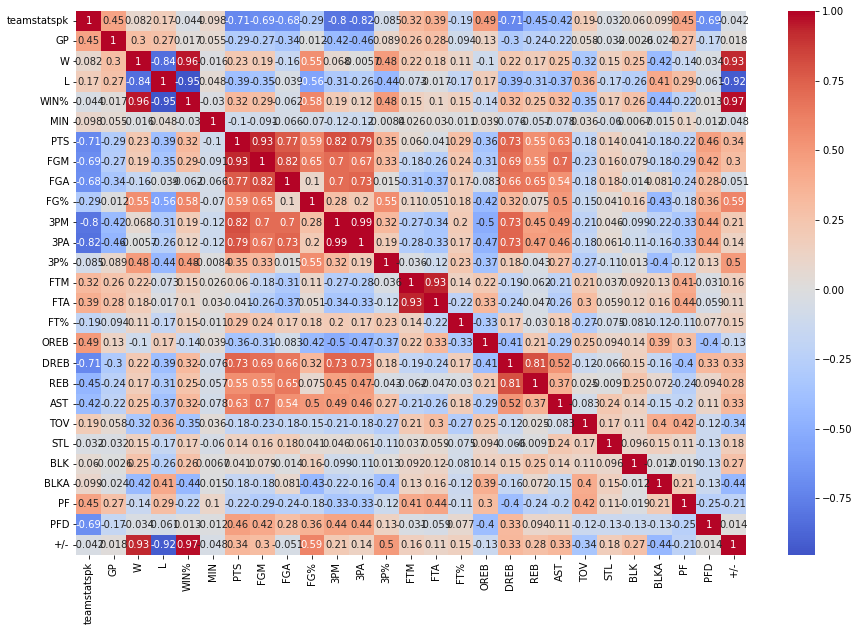

In [23]:
corrs = data.corr(method = 'pearson')

plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);